# Квантили 

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import mstats as mst
import math
import matplotlib.pyplot as plt
import time 

start = time.time()

n = 252 #объём выборки
m = 10000 #количество произведенных вычислений
ex= [0] * m
mod_set = [[]] * m #список нормальных распределений на каждом шаге
for i in range(m):
    mod_set[i] = np.random.normal(size=n)
    ex[i] = st.kurtosis(mod_set[i], fisher=True, bias=True)

kvant = [0] * 9 #для квантилей от 0,1 до 0,9
for i in range(1,10):
    kvant[i-1] = float(mst.mquantiles(ex, prob=[i/10], betap=0.5, alphap=0.5))
    
a = range(1, 1000, 1) #для квантилей от 0,001 до 0,999
qs = [0] * len(a)
for i in a:
    qs[i-1] = float(mst.mquantiles(ex, prob=[i/1000], betap=0.5, alphap=0.5))
    
tab_qvant = pd.DataFrame() #создаем таблицу
tab_qvant['Уровень'] = [i/10 for i in range(1,10)]
tab_qvant['Квантиль'] = kvant
tab_qvant.to_excel(u'C:/Users/Андрюша/Desktop/Акции_курсовая/Таблица_квантилей_из_выборки_объёма ' + str(n) + ".xlsx", index=False, encoding='cp1251')

print("Время выполнения = {}".format(time.time() - start))

Время выполнения = 207.22115635871887


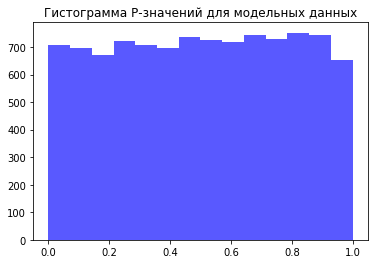

In [3]:
pv=[] # список p-value для гистограммы
for i in range(m):
    pv.append(st.shapiro(np.random.normal(size=n))[1])
kolint=(math.log2(len(pv)))//1+1
plt.title('Гистограмма P-значений для модельных данных')
plt.hist(pv, bins=int(kolint), color='b', alpha=0.65)
plt.savefig(u"C:/Users/Андрюша/Desktop/Акции_Курсовая/Гистограмма P-значений для модельных данных.png")

In [4]:
print("Стандартная ошибка {}".format(st.sem(ex)))
tab_qvant

Стандартная ошибка 0.003002394577956973


,Уровень,Квантиль
0,0.1,-0.373288
1,0.2,-0.271008
2,0.3,-0.197392
3,0.4,-0.127062
4,0.5,-0.060720
5,0.6,0.008599
6,0.7,0.093484
7,0.8,0.202112
8,0.9,0.361465
